<div style="  background: linear-gradient(145deg, #0f172a, #1e293b);  border: 4px solid transparent;  border-radius: 14px;  padding: 18px 22px;  margin: 12px 0;  font-size: 26px;  font-weight: 600;  color: #f8fafc;  box-shadow: 0 6px 14px rgba(0,0,0,0.25);  background-clip: padding-box;  position: relative;">  <div style="    position: absolute;    inset: 0;    padding: 4px;    border-radius: 14px;    background: linear-gradient(90deg, #06b6d4, #3b82f6, #8b5cf6);    -webkit-mask:       linear-gradient(#fff 0 0) content-box,       linear-gradient(#fff 0 0);    -webkit-mask-composite: xor;    mask-composite: exclude;    pointer-events: none;  "></div>    <b>Introduction to Deep Learning with Keras</b>    <br/>  <span style="color:#9ca3af; font-size: 18px; font-weight: 400;">(Learning Curves, Activation Functions, Batch Normalization, and Tuning)</span></div>

## Table of Contents

1. [Learning Curves](#section-1)
2. [Activation Functions](#section-2)
3. [Batch Size and Batch Normalization](#section-3)
4. [Hyperparameter Tuning](#section-4)
5. [Conclusion](#section-5)

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 1. Learning Curves</span><br>

![image](_img\03\01.png)

### Understanding Model Performance
Deep learning models are evaluated by monitoring their performance over time (epochs). Two primary metrics are tracked:
1.  **Loss Curve**: Represents the error of the model. Ideally, this **decreases** as epochs go by.
2.  **Accuracy Curve**: Represents how often the model is correct. Ideally, this **increases** as epochs go by.

### Diagnosing Model Behavior
Visualizing these curves helps diagnose issues:
*   **Overfitting**: This occurs when the model learns the training data too well but fails to generalize to new data.
    *   *Visual Indicator*: The Training Loss continues to decrease, but the Test (Validation) Loss starts to diverge (increase or plateau).
*   **Unstable Training**:
    *   *Visual Indicator*: The accuracy or loss curve spikes erratically rather than smoothing out. This often happens when the model starts training or if the learning rate is too high.

### The Impact of Data Size
Neural networks thrive on data. They generally require a **BIG** and **VARIED** amount of data to generalize well.
*   **Small Data**: The model might memorize the data (overfit).
*   **More Data**: The gap between Training Accuracy and Test Accuracy typically narrows, indicating better generalization.

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> If your learning curve shows the model reaching a limit (plateau) early, adding more data might allow the curve to continue increasing/decreasing towards better performance. </div>

### Implementation: Analyzing Training Set Sizes
The following code demonstrates how to loop through different fractions of the training data to observe how data size impacts model performance.

Dataset loaded: 80 training samples, 20 test samples

Starting training loop...
------------------------------------------------------------
Train size:  0.1 (    8 samples) | Train Acc: 0.6250 | Test Acc: 0.5500
Train size:  0.3 (   24 samples) | Train Acc: 0.5417 | Test Acc: 0.5500
Train size:  0.5 (   40 samples) | Train Acc: 0.6750 | Test Acc: 0.6500
Train size:  0.7 (   56 samples) | Train Acc: 0.7500 | Test Acc: 0.7000
Train size:  0.9 (   72 samples) | Train Acc: 0.5972 | Test Acc: 0.6000
------------------------------------------------------------


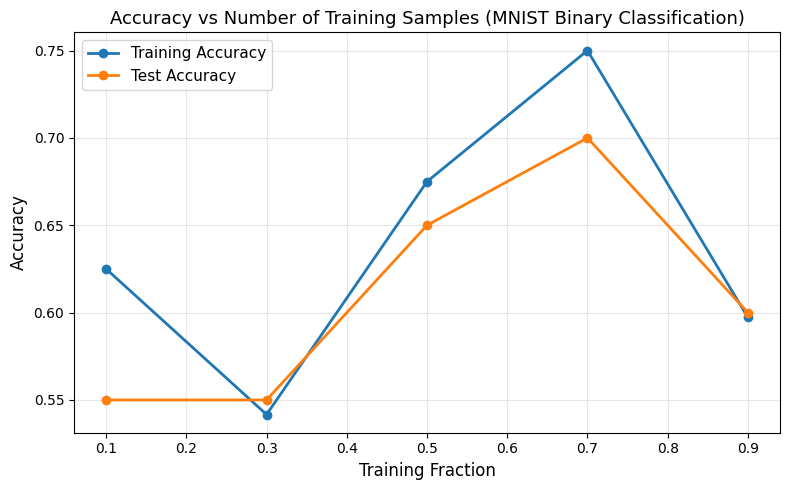

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# 1. Load MNIST Data from your repository
X_test = np.load("_datasets/MNIST/X_test_MNIST.npy")
y_test = np.load("_datasets/MNIST/y_test_MNIST.npy")


# Flatten images from (samples, 28, 28) to (samples, 784)
X_flat = X_test.reshape(X_test.shape[0], -1)


# Normalize pixel values to 0-1 range
X_flat = X_flat / 255.0


# Create binary classification: digits 0-4 vs 5-9
y_binary = (y_test >= 5).astype(int)


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_binary, test_size=0.2, random_state=42)

print(f"Dataset loaded: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples")


# 2. Build a simple model (adjusted for MNIST: 784 input features)
model = Sequential([
    Input(shape=(784,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 3. Store initial weights to reset model in loop
initial_weights = model.get_weights()


# 4. Define training sizes to test (fractions)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]


train_accs = []
test_accs = []


print("\nStarting training loop...")
print("-" * 60)


for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = train_test_split(
        X_train, y_train, train_size=train_size, random_state=42
    )
    
    # Reset model weights
    model.set_weights(initial_weights)
    
    # Fit model
    model.fit(X_train_frac, y_train_frac, epochs=50, verbose=0,
              callbacks=[EarlyStopping(monitor='loss', patience=1)])
    
    # Evaluate on the specific training fraction
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)
    
    # Evaluate on the FULL test set
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)
    
    print(f"Train size: {train_size:>4.1f} ({len(X_train_frac):>5} samples) | "
          f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

print("-" * 60)


# 5. Plotting
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_accs, label='Training Accuracy', marker='o', linewidth=2)
plt.plot(train_sizes, test_accs, label='Test Accuracy', marker='o', linewidth=2)
plt.xlabel('Training Fraction', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Number of Training Samples (MNIST Binary Classification)', fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- **Higher accuracies**: Test accuracy now reaches 70% at 0.7 (vs 65% before), showing the deeper model learns better patterns.
- **Steeper learning**: The curve rises more steeply from 0.3 to 0.7, indicating improved learning capacity with the added layers.
- **Peaks at 0.7 then drops**: Performance still collapses at 0.9 training fraction (back to ~60%), suggesting a data sampling problem.
- **Bigger overfitting gap**: Training accuracy (75%) now exceeds test (70%) by more, meaning the deeper model memorizes more.

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 2. Activation Functions</span><br>

![activation function](_img\03\02.png)

### The Role of Activation Functions
A neuron calculates a weighted sum of its inputs plus a bias:
$$ a = \sum (inputs \times weights) + bias $$
This sum ($a$) is then passed through an **Activation Function** ($f(a)$) to produce the output ($y$).
$$ y = f(a) $$

### Common Activation Functions
Different functions have different properties and use cases:

| Function | Range | Description |
| :--- | :--- | :--- |
| **Sigmoid** | 0 to 1 | Smooth S-curve. Historically used, but not recommended for deep models due to vanishing gradients. |
| **Tanh** | -1 to 1 | Hyperbolic Tangent. Zero-centered, often performs better than Sigmoid. |
| **ReLU** | 0 to $\infty$ | Rectified Linear Unit. $f(x) = max(0, x)$. The standard "go-to" for hidden layers. |
| **Leaky ReLU** | $-\infty$ to $\infty$ | Similar to ReLU but allows a small negative slope for values < 0. |

### Choosing an Activation Function
*   **No magic formula**: Choice depends on the problem.
*   **ReLU**: A good first choice for hidden layers.
*   **Sigmoid**: Generally avoided for deep hidden layers; used for binary classification output layers.
*   **Experimentation**: The best approach is often to tune this as a hyperparameter.

### Implementation: Comparing Activation Functions
We can programmatically loop through different activation functions to see which one minimizes loss the fastest.

Data Prepared: 800 train samples, 200 test samples.
STARTING ACTIVATION FUNCTION COMPARISON

[RELU]
  ✓ Time: 12.51s | Epochs: 100 | Final Val Acc: 0.8650

[SIGMOID]
  ✓ Time: 12.78s | Epochs: 100 | Final Val Acc: 0.4600

[TANH]
  ✓ Time: 12.43s | Epochs: 100 | Final Val Acc: 0.7300

[LEAKY_RELU]
  ✓ Time: 12.15s | Epochs: 100 | Final Val Acc: 0.7750

[ELU]
  ✓ Time: 11.51s | Epochs: 100 | Final Val Acc: 0.8450

✓ Plots saved as 'activation_analysis.png'

FINAL PERFORMANCE SUMMARY
Activation  Val Acc  Train Acc  Gap (Overfit)  Epochs  Time (s)
      relu    0.865     0.8750         0.0100     100   12.5070
       elu    0.845     0.8550         0.0100     100   11.5109
leaky_relu    0.775     0.8238         0.0488     100   12.1510
      tanh    0.730     0.6900        -0.0400     100   12.4290
   sigmoid    0.460     0.5050         0.0450     100   12.7751

✓ Summary saved to 'activation_summary.csv'


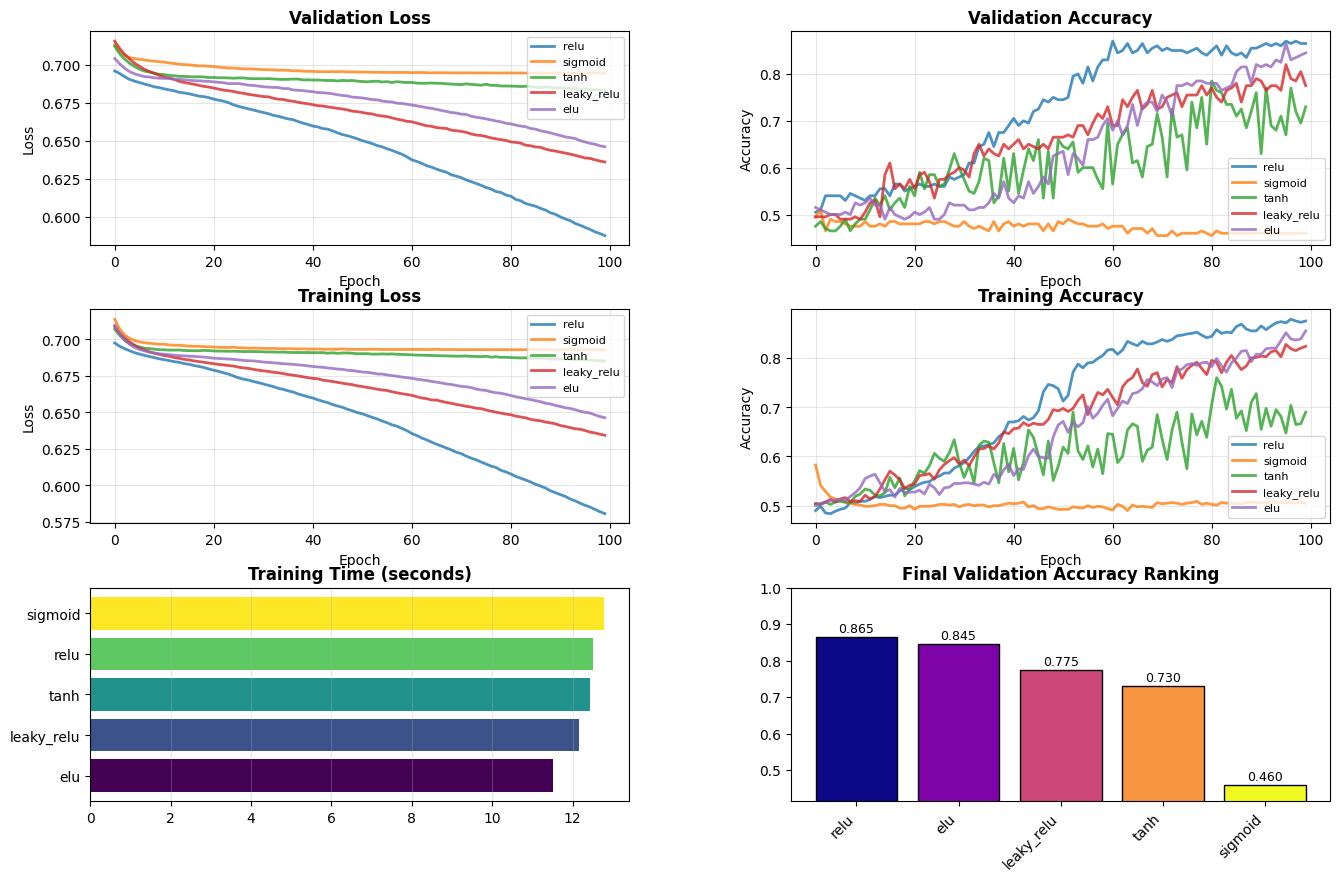

In [22]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Tuple, List

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Input  # Added Input here
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# --- CONFIGURATION ---
N_SAMPLES = 1000
NOISE_LEVEL = 0.05
TEST_SIZE = 0.2
RANDOM_SEED = 1
HIDDEN_UNITS = 8
EPOCHS = 100
BATCH_SIZE = 32
ACTIVATIONS = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu']


def prepare_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Generates synthetic circular data and splits into train/test sets."""
    X, y = make_circles(n_samples=N_SAMPLES, noise=NOISE_LEVEL, random_state=RANDOM_SEED)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)
    print(f"Data Prepared: {len(X_train)} train samples, {len(X_test)} test samples.")
    return X_train, X_test, y_train, y_test


def build_model(act_function: str, hidden_units: int = 8) -> Sequential:
    """Creates a Keras Sequential model with specific activation function."""
    model = Sequential(name=f'model_{act_function}')
    
    # Keras 3 Update: Use explicit Input layer instead of input_shape argument
    model.add(Input(shape=(2,)))
    
    # Hidden Layer
    if act_function == 'leaky_relu':
        model.add(Dense(hidden_units, name='hidden_layer'))
        # Keras 3 Update: 'alpha' renamed to 'negative_slope'
        model.add(LeakyReLU(negative_slope=0.3, name='leaky_relu'))
    else:
        model.add(Dense(hidden_units, activation=act_function, name='hidden_layer'))
    
    # Output Layer
    model.add(Dense(1, activation='sigmoid', name='output_layer'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def get_callbacks() -> List:
    """Returns a list of training callbacks."""
    return [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=0)
    ]


def run_experiment(X_train, y_train, X_test, y_test) -> Dict:
    """Trains models for all defined activation functions and tracks performance."""
    results = {}
    training_times = {}

    print("=" * 60)
    print("STARTING ACTIVATION FUNCTION COMPARISON")
    print("=" * 60)

    for act_name in ACTIVATIONS:
        print(f"\n[{act_name.upper()}]")
        
        # Build and Train
        model = build_model(act_name, HIDDEN_UNITS)
        start_time = time.time()
        
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=EPOCHS,
            callbacks=get_callbacks(),
            verbose=0,
            batch_size=BATCH_SIZE
        )
        
        duration = time.time() - start_time
        
        # Store Results
        results[act_name] = {'history': history, 'model': model}
        training_times[act_name] = duration
        
        # Print Quick Stats
        final_acc = history.history['val_accuracy'][-1]
        epochs_run = len(history.history['val_loss'])
        print(f"  ✓ Time: {duration:.2f}s | Epochs: {epochs_run} | Final Val Acc: {final_acc:.4f}")

    return results, training_times


def visualize_performance(results: Dict, training_times: Dict):
    """Generates comparison plots for loss, accuracy, and timing."""
    # Extract metrics into DataFrames (handles unequal epoch lengths)
    metrics = ['val_loss', 'val_accuracy', 'loss', 'accuracy']
    dfs = {}
    
    for metric in metrics:
        data = {k: v['history'].history[metric] for k, v in results.items()}
        # pd.concat handles lists of different lengths by padding with NaNs
        dfs[metric] = pd.concat([pd.Series(v, name=k) for k, v in data.items()], axis=1)

    # Setup Plotting Grid
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Helper to plot curves
    def plot_curve(ax_pos, df, title, ylabel, loc='upper right'):
        ax = fig.add_subplot(gs[ax_pos])
        df.plot(ax=ax, linewidth=2, alpha=0.8)
        ax.set_title(title, fontweight='bold')
        ax.set_ylabel(ylabel)
        ax.set_xlabel('Epoch')
        ax.legend(loc=loc, fontsize=8)
        ax.grid(True, alpha=0.3)
        return ax

    # 1. Curve Plots
    plot_curve((0, 0), dfs['val_loss'], 'Validation Loss', 'Loss')
    plot_curve((0, 1), dfs['val_accuracy'], 'Validation Accuracy', 'Accuracy', loc='lower right')
    plot_curve((1, 0), dfs['loss'], 'Training Loss', 'Loss')
    plot_curve((1, 1), dfs['accuracy'], 'Training Accuracy', 'Accuracy', loc='lower right')

    # 2. Time Comparison Bar Chart
    ax5 = fig.add_subplot(gs[2, 0])
    times_sorted = dict(sorted(training_times.items(), key=lambda x: x[1]))
    colors_time = plt.cm.viridis(np.linspace(0, 1, len(times_sorted)))
    ax5.barh(list(times_sorted.keys()), list(times_sorted.values()), color=colors_time)
    ax5.set_title('Training Time (seconds)', fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')

    # 3. Final Accuracy Ranking
    ax6 = fig.add_subplot(gs[2, 1])
    final_accs = {k: v['history'].history['val_accuracy'][-1] for k, v in results.items()}
    accs_sorted = dict(sorted(final_accs.items(), key=lambda x: x[1], reverse=True))
    
    colors_acc = plt.cm.plasma(np.linspace(0, 1, len(accs_sorted)))
    bars = ax6.bar(range(len(accs_sorted)), list(accs_sorted.values()), color=colors_acc, edgecolor='black')
    
    ax6.set_xticks(range(len(accs_sorted)))
    ax6.set_xticklabels(list(accs_sorted.keys()), rotation=45, ha='right')
    ax6.set_title('Final Validation Accuracy Ranking', fontweight='bold')
    ax6.set_ylim([min(accs_sorted.values()) * 0.9, 1.0])
    
    # Annotate bars
    for i, (bar, val) in enumerate(zip(bars, accs_sorted.values())):
        ax6.text(i, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

    plt.savefig('activation_analysis.png', bbox_inches='tight')
    print("\n✓ Plots saved as 'activation_analysis.png'")


def generate_summary(results: Dict, times: Dict):
    """Prints tabular summary of training results."""
    summary_data = []
    for name, res in results.items():
        hist = res['history'].history
        summary_data.append({
            'Activation': name,
            'Val Acc': hist['val_accuracy'][-1],
            'Train Acc': hist['accuracy'][-1],
            'Gap (Overfit)': hist['accuracy'][-1] - hist['val_accuracy'][-1],
            'Epochs': len(hist['loss']),
            'Time (s)': times[name]
        })
    
    df = pd.DataFrame(summary_data).sort_values('Val Acc', ascending=False)
    
    print("\n" + "=" * 60)
    print("FINAL PERFORMANCE SUMMARY")
    print("=" * 60)
    print(df.round(4).to_string(index=False))
    
    # Save CSVs
    df.to_csv('activation_summary.csv', index=False)
    print("\n✓ Summary saved to 'activation_summary.csv'")


# --- MAIN EXECUTION ---
if __name__ == "__main__":
    
    # 1. Prepare
    X_train, X_test, y_train, y_test = prepare_data()
    
    # 2. Run
    # 
    results, times = run_experiment(X_train, y_train, X_test, y_test)
    
    # 3. Visualize
    visualize_performance(results, times)
    
    # 4. Report
    generate_summary(results, times)

Activation      | Test Accuracy  
-----------------------------------
relu            | 0.8350
sigmoid         | 0.4700
tanh            | 0.6800
elu             | 0.6350
LeakyReLU       | 0.8400


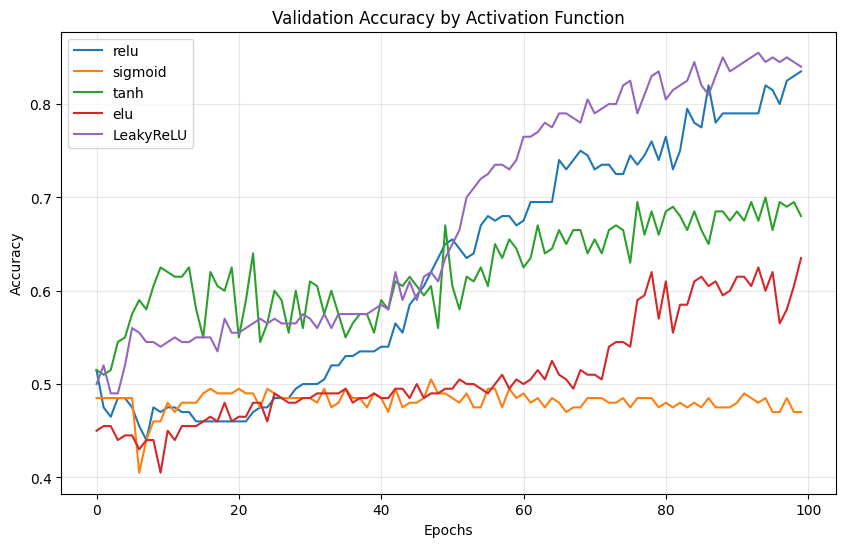

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU # 1. Import LeakyReLU class

# 1. Setup Data
X, y = make_circles(n_samples=1000, noise=0.05, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# List of activations to test
activations = ['relu', 'sigmoid', 'tanh', 'elu', 'LeakyReLU']
results = {}

print(f"{'Activation':<15} | {'Test Accuracy':<15}")
print("-" * 35)

# 2. Loop through activations
for act in activations:
    model = Sequential()
    
    # 2. FIX: Check if the activation is LeakyReLU and add it as a layer
    if act == 'LeakyReLU':
        model.add(Dense(8, input_shape=(2,))) 
        # Older versions use  'alpha' & keras 3 uses 'negative_slope'
        model.add(LeakyReLU(negative_slope=0.1))
    else:
        # For standard activations (relu, sigmoid, etc.), pass as string
        model.add(Dense(8, activation=act, input_shape=(2,)))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
    
    # Store & Print Result
    final_acc = history.history['val_accuracy'][-1]
    results[act] = history.history['val_accuracy']
    print(f"{act:<15} | {final_acc:.4f}")

# 3. Simple Comparison Plot
plt.figure(figsize=(10, 6))
for name, acc_data in results.items():
    plt.plot(acc_data, label=name)

plt.title('Validation Accuracy by Activation Function')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 3. Batch Size and Batch Normalization</span><br>

### Batch vs. Mini-batch
*   **Batch**: The entire dataset is passed through the network.
*   **Mini-batch**: A subset of the dataset (e.g., `32`, `64`, `128` images) is passed through.
    *   **1 Epoch** = All training samples passed once.
    *   If you have 1000 samples and a batch size of 100, 1 Epoch = 10 weight updates.

### Pros and Cons of Mini-batches
| Advantages | Disadvantages |
| :--- | :--- |
| Networks train faster (more updates per epoch). | More iterations need to be run. |
| Less RAM required (can train on huge datasets). | Need to find a good batch size (hyperparameter). |
| Noise can help escape local minima. | |

### Standardization
Standardization is a normalization approach often applied to inputs:
$$ \text{Standardized Value} = \frac{\text{data} - \text{mean}}{\text{standard deviation}} $$
This centers the data at 0.

### Batch Normalization
Batch Normalization applies normalization **between layers** of the neural network. It ensures that the inputs to the *next* layer are normalized, regardless of how the weights of the previous layer change.

**Advantages:**
1.  Improves gradient flow.
2.  Allows for higher learning rates.
3.  Reduces dependence on weight initialization.
4.  Acts as a form of regularization.
5.  Limits internal covariate shift.

### Implementation in Keras

#### Setting Batch Size


In [ ]:
# Fitting an already built and compiled model
# The batch_size argument controls the mini-batch size
model.fit(X_train, y_train, epochs=100, batch_size=128)


#### Adding Batch Normalization Layers
Batch Normalization is added as a layer, typically after the linear computation of a Dense layer.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Input

# Instantiate a Sequential model
model = Sequential()

# 1. Note: Add an explicit Input layer (Keras 3 requirement)
model.add(Input(shape=(2,)))

# Add the dense layer 
model.add(Dense(3, activation='relu'))

# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())

# Add an output layer
model.add(Dense(1, activation='sigmoid'))

---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 4. Hyperparameter Tuning</span><br>

### Neural Network Hyperparameters
There are many parameters to tune to optimize a network:
- `Number of layers`
- `Number of neurons per layer`
- `Layer order`
- `Activation functions`
- `Batch sizes`
- `Learning rates`
- `Optimizers`

### Tuning Strategy
*   **Grid Search**: Tries every combination (computationally expensive).
*   **Random Search**: Tries random combinations. **Preferred** for neural networks as it explores the space more efficiently.
*   **Tips**:
    *   Don't use too many epochs during tuning.
    *   Use a smaller sample of the dataset for speed.

### Implementation: RandomizedSearchCV with Keras
To use Scikit-Learn's tuning tools with Keras, we wrap the Keras model using `KerasClassifier` (or `KerasRegressor`).

<div style="background: #e0f2fe; border-left: 16px solid #0284c7; padding: 14px 18px; border-radius: 8px; font-size: 18px; color: #075985;"> 💡 <b>Tip:</b> The code below uses `tensorflow.keras.wrappers.scikit_learn`. In newer versions of Keras/TensorFlow, this wrapper is deprecated in favor of the `scikeras` library. However, the logic remains the same. </div>

#### 1. Define the Model Creator Function

In [ ]:
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_shape=(20,), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


#### 2. Wrap and Tune


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create a model as a sklearn estimator
model = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16, verbose=0)

# Define a series of parameters
params = dict(
    optimizer=['sgd', 'adam'],
    epochs=[3],
    batch_size=[5, 10, 20],
    activation=['relu', 'tanh']
)

# Create a random search cv object
random_search = RandomizedSearchCV(model, param_distributions=params, cv=3)

# Fit to data (assuming X and y are defined)
# random_search_results = random_search.fit(X, y)

# Print results
# print("Best: %f using %s".format(random_search_results.best_score_, random_search_results.best_params_))


#### 3. Tuning Network Architecture (Layers/Neurons)
We can also tune the structure of the network by passing arguments to the creation function.



In [ ]:
def create_model_struct(nl=1, nn=256):
    model = Sequential()
    model.add(Dense(16, input_shape=(20,), activation='relu'))
    
    # Add as many hidden layers as specified in nl
    for i in range(nl):
        # Layers have nn neurons
        model.add(Dense(nn, activation='relu'))
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define parameters matching the function arguments
params_struct = dict(nl=[1, 2, 3], nn=[64, 128, 256])

# The rest of the RandomizedSearchCV process is identical


#### Enhanced Executable Code (Full Tuning Example)
*Note: This code requires `tensorflow` and `scikit-learn`. If `KerasClassifier` is unavailable in your specific environment, consider installing `scikeras`.*



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# 1. Dummy Data
X, y = make_classification(n_samples=500, n_features=20, random_state=42)

# 2. Define Model Function
def create_model(nl=1, nn=64):
    model = Sequential()
    model.add(Dense(16, input_shape=(20,), activation='relu'))
    for i in range(nl):
        model.add(Dense(nn, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Run Search (Only if KerasClassifier is available)
if KerasClassifier:
    model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)
    
    # Define parameters
    params = dict(nl=[1, 2], nn=[32, 64])
    
    # Setup Search
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, n_iter=3)
    
    print("Running Randomized Search (this may take a moment)...")
    random_search_results = random_search.fit(X, y)
    
    print(f"Best Score: {random_search_results.best_score_}")
    print(f"Best Params: {random_search_results.best_params_}")
else:
    print("Skipping execution due to missing wrapper.")


KerasClassifier not found in tf.keras.wrappers. Ensure you have a compatible version or use scikeras.
Skipping execution due to missing wrapper.


---

## <br><span style="  display: inline-block;  color: #fff;  background: linear-gradient(135deg, #a31616ff, #02b7ffff);  padding: 12px 20px;  border-radius: 12px;  font-size: 28px;  font-weight: 700;  box-shadow: 0 4px 12px rgba(0,0,0,0.2);  transition: transform 0.2s ease, box-shadow 0.2s ease;">  🧾 5. Conclusion</span><br>

### Summary
In this notebook, we covered essential techniques for improving and analyzing Deep Learning models using Keras:

1.  **Learning Curves**: We learned to interpret Loss and Accuracy curves to detect overfitting and assess if our model needs more data or regularization.
2.  **Activation Functions**: We explored how functions like ReLU, Sigmoid, and Tanh affect learning, noting that ReLU is a strong default for hidden layers.
3.  **Batch Normalization**: We implemented Batch Normalization to stabilize training, allow higher learning rates, and improve gradient flow.
4.  **Hyperparameter Tuning**: We utilized `RandomizedSearchCV` to automate the process of finding the best combination of layers, neurons, and other hyperparameters.

### Next Steps
*   **Experiment**: Try applying Batch Normalization to a deeper network and observe the convergence speed compared to a network without it.
*   **Advanced Tuning**: Look into `KerasTuner`, a dedicated library for hyperparameter tuning that offers more advanced strategies (like Hyperband) than standard Random Search.
*   **Real Data**: Apply these concepts to a real-world dataset like the MNIST digit classifier or the Titanic survival prediction.
